##  Codigo 2 :  DM  en el Coeval
### Utilizamos los datos del coeval para ver los Halos de DM 

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import os

import py21cmfast as p21c

# For plotting the cubes, we use the plotting submodule:
from py21cmfast import plotting

# For interacting with the cache
from py21cmfast import cache_tools

import h5py
import numpy as np

/home/ogarcia/miniconda3/envs/tesis3/lib/python3.10/site-packages/py21cmfast/_cfg.py:57: UserWarning: Your configuration file is out of date. Updating...
  warnings.warn(
/home/ogarcia/miniconda3/envs/tesis3/lib/python3.10/site-packages/py21cmfast/_cfg.py:41: UserWarning: Your configuration file is out of date. Updating...
  warnings.warn("Your configuration file is out of date. Updating...")


In [2]:
if not os.path.exists('_cache'):
    os.mkdir('_cache')

p21c.config['direc'] = '_cache'
cache_tools.clear_cache(direc="_cache")

In [3]:
from py21cmfast import (
    AstroParams,
    CosmoParams,
    FlagOptions,
    UserParams,
    determine_halo_list,
    initial_conditions,
    perturb_field,
)


from py21cmfast._utils import StructInstanceWrapper
from py21cmfast.c_21cmfast import ffi, lib
import numpy as np

In [4]:
    user_params = UserParams(
    DIM=128,
    USE_FFTW_WISDOM=True,
    HMF=1,
    N_THREADS=4,
    NO_RNG=True,
    PERTURB_ON_HIGH_RES=True,
)

In [5]:
# Parametros cosmologicos

cosmo_params = CosmoParams(
        OMb=0.0486, 
        OMm=0.3075, 
        POWER_INDEX=0.97, 
        SIGMA_8=0.82, 
        hlittle=0.6774
    )

# Generamos el COEVAL
## En este caso usamos el USE_MINI_HALOS 

In [6]:
coeval = p21c.run_coeval(
    redshift = 6.0,
    user_params = {"HII_DIM": 64, "BOX_LEN": 150, "N_THREADS": 4 },
    flag_options={"USE_TS_FLUCT": True, "M_MIN_in_Mass":True , "USE_HALO_FIELD": False, "USE_MINI_HALOS": True , "USE_MASS_DEPENDENT_ZETA":True},
    cosmo_params = { "OMb":0.0486, 
        "OMm": 0.31, 
        "POWER_INDEX": 0.97, 
        "SIGMA_8": 0.81, 
        "hlittle": 0.68, 
         },
 
    regenerate=None,
    write=None,
    direc=None,
    
)

/home/ogarcia/miniconda3/envs/tesis3/lib/python3.10/site-packages/py21cmfast/_utils.py:400: UserWarning: The following parameters to FlagOptions are not supported: ['USE_VELS_AUX']
  warnings.warn(
2024-04-15 09:52:01,544 | WARNING | inputs.py::INHOMO_RECO() | You have set USE_MINI_HALOS to True but INHOMO_RECO to False! Automatically setting INHOMO_RECO to True.
2024-04-15 09:52:01,544 | WARNING | inputs.py::validate_all_inputs() | USE_MINI_HALOS needs USE_RELATIVE_VELOCITIES to get the right evolution!
/home/ogarcia/miniconda3/envs/tesis3/lib/python3.10/site-packages/py21cmfast/inputs.py:491: UserWarning: The USE_INTERPOLATION_TABLES setting has changed in v3.1.2 to be default True. You can likely ignore this warning, but if you relied onhaving USE_INTERPOLATION_TABLES=False by *default*, please set it explicitly. To silence this warning, set it explicitly to True. Thiswarning will be removed in v4.
  warnings.warn(
2024-04-15 09:52:04,209 | WARNING | inputs.py::INHOMO_RECO() | You h

2024-04-15 09:52:53,067 | WARNING | inputs.py::INHOMO_RECO() | You have set USE_MINI_HALOS to True but INHOMO_RECO to False! Automatically setting INHOMO_RECO to True.
2024-04-15 09:52:53,069 | WARNING | inputs.py::INHOMO_RECO() | You have set USE_MINI_HALOS to True but INHOMO_RECO to False! Automatically setting INHOMO_RECO to True.
2024-04-15 09:52:53,069 | WARNING | inputs.py::INHOMO_RECO() | You have set USE_MINI_HALOS to True but INHOMO_RECO to False! Automatically setting INHOMO_RECO to True.
2024-04-15 09:52:53,070 | WARNING | inputs.py::INHOMO_RECO() | You have set USE_MINI_HALOS to True but INHOMO_RECO to False! Automatically setting INHOMO_RECO to True.
2024-04-15 09:52:53,070 | WARNING | inputs.py::validate_all_inputs() | USE_MINI_HALOS needs USE_RELATIVE_VELOCITIES to get the right evolution!
2024-04-15 09:52:53,071 | WARNING | inputs.py::INHOMO_RECO() | You have set USE_MINI_HALOS to True but INHOMO_RECO to False! Automatically setting INHOMO_RECO to True.
2024-04-15 09:52

2024-04-15 09:53:39,144 | WARNING | inputs.py::INHOMO_RECO() | You have set USE_MINI_HALOS to True but INHOMO_RECO to False! Automatically setting INHOMO_RECO to True.
2024-04-15 09:53:39,144 | WARNING | inputs.py::validate_all_inputs() | USE_MINI_HALOS needs USE_RELATIVE_VELOCITIES to get the right evolution!
2024-04-15 09:53:39,145 | WARNING | inputs.py::INHOMO_RECO() | You have set USE_MINI_HALOS to True but INHOMO_RECO to False! Automatically setting INHOMO_RECO to True.
2024-04-15 09:53:39,147 | WARNING | inputs.py::INHOMO_RECO() | You have set USE_MINI_HALOS to True but INHOMO_RECO to False! Automatically setting INHOMO_RECO to True.
2024-04-15 09:53:39,147 | WARNING | inputs.py::INHOMO_RECO() | You have set USE_MINI_HALOS to True but INHOMO_RECO to False! Automatically setting INHOMO_RECO to True.
2024-04-15 09:53:51,942 | WARNING | inputs.py::INHOMO_RECO() | You have set USE_MINI_HALOS to True but INHOMO_RECO to False! Automatically setting INHOMO_RECO to True.
2024-04-15 09:53

2024-04-15 09:54:28,077 | WARNING | inputs.py::INHOMO_RECO() | You have set USE_MINI_HALOS to True but INHOMO_RECO to False! Automatically setting INHOMO_RECO to True.
2024-04-15 09:54:28,080 | WARNING | inputs.py::INHOMO_RECO() | You have set USE_MINI_HALOS to True but INHOMO_RECO to False! Automatically setting INHOMO_RECO to True.
2024-04-15 09:54:34,044 | WARNING | inputs.py::INHOMO_RECO() | You have set USE_MINI_HALOS to True but INHOMO_RECO to False! Automatically setting INHOMO_RECO to True.
2024-04-15 09:54:34,071 | WARNING | inputs.py::INHOMO_RECO() | You have set USE_MINI_HALOS to True but INHOMO_RECO to False! Automatically setting INHOMO_RECO to True.
2024-04-15 09:54:34,072 | WARNING | inputs.py::INHOMO_RECO() | You have set USE_MINI_HALOS to True but INHOMO_RECO to False! Automatically setting INHOMO_RECO to True.
2024-04-15 09:54:34,073 | WARNING | inputs.py::INHOMO_RECO() | You have set USE_MINI_HALOS to True but INHOMO_RECO to False! Automatically setting INHOMO_RECO t

2024-04-15 09:56:00,254 | WARNING | inputs.py::INHOMO_RECO() | You have set USE_MINI_HALOS to True but INHOMO_RECO to False! Automatically setting INHOMO_RECO to True.
2024-04-15 09:56:00,539 | WARNING | inputs.py::INHOMO_RECO() | You have set USE_MINI_HALOS to True but INHOMO_RECO to False! Automatically setting INHOMO_RECO to True.
2024-04-15 09:56:00,541 | WARNING | inputs.py::INHOMO_RECO() | You have set USE_MINI_HALOS to True but INHOMO_RECO to False! Automatically setting INHOMO_RECO to True.
2024-04-15 09:56:00,543 | WARNING | inputs.py::INHOMO_RECO() | You have set USE_MINI_HALOS to True but INHOMO_RECO to False! Automatically setting INHOMO_RECO to True.
2024-04-15 09:56:00,543 | WARNING | inputs.py::INHOMO_RECO() | You have set USE_MINI_HALOS to True but INHOMO_RECO to False! Automatically setting INHOMO_RECO to True.
2024-04-15 09:56:00,544 | WARNING | inputs.py::INHOMO_RECO() | You have set USE_MINI_HALOS to True but INHOMO_RECO to False! Automatically setting INHOMO_RECO t

2024-04-15 09:57:12,972 | WARNING | inputs.py::INHOMO_RECO() | You have set USE_MINI_HALOS to True but INHOMO_RECO to False! Automatically setting INHOMO_RECO to True.
2024-04-15 09:57:12,973 | WARNING | inputs.py::INHOMO_RECO() | You have set USE_MINI_HALOS to True but INHOMO_RECO to False! Automatically setting INHOMO_RECO to True.
2024-04-15 09:57:12,974 | WARNING | inputs.py::INHOMO_RECO() | You have set USE_MINI_HALOS to True but INHOMO_RECO to False! Automatically setting INHOMO_RECO to True.
2024-04-15 09:57:12,974 | WARNING | inputs.py::validate_all_inputs() | USE_MINI_HALOS needs USE_RELATIVE_VELOCITIES to get the right evolution!
2024-04-15 09:57:12,975 | WARNING | inputs.py::INHOMO_RECO() | You have set USE_MINI_HALOS to True but INHOMO_RECO to False! Automatically setting INHOMO_RECO to True.
2024-04-15 09:57:12,977 | WARNING | inputs.py::INHOMO_RECO() | You have set USE_MINI_HALOS to True but INHOMO_RECO to False! Automatically setting INHOMO_RECO to True.
2024-04-15 09:57

2024-04-15 09:58:38,759 | WARNING | inputs.py::INHOMO_RECO() | You have set USE_MINI_HALOS to True but INHOMO_RECO to False! Automatically setting INHOMO_RECO to True.
2024-04-15 09:58:38,760 | WARNING | inputs.py::validate_all_inputs() | USE_MINI_HALOS needs USE_RELATIVE_VELOCITIES to get the right evolution!
2024-04-15 09:58:38,760 | WARNING | inputs.py::INHOMO_RECO() | You have set USE_MINI_HALOS to True but INHOMO_RECO to False! Automatically setting INHOMO_RECO to True.
2024-04-15 09:58:38,762 | WARNING | inputs.py::INHOMO_RECO() | You have set USE_MINI_HALOS to True but INHOMO_RECO to False! Automatically setting INHOMO_RECO to True.
2024-04-15 09:58:44,697 | WARNING | inputs.py::INHOMO_RECO() | You have set USE_MINI_HALOS to True but INHOMO_RECO to False! Automatically setting INHOMO_RECO to True.
2024-04-15 09:58:44,728 | WARNING | inputs.py::INHOMO_RECO() | You have set USE_MINI_HALOS to True but INHOMO_RECO to False! Automatically setting INHOMO_RECO to True.
2024-04-15 09:58

2024-04-15 09:59:44,729 | WARNING | inputs.py::INHOMO_RECO() | You have set USE_MINI_HALOS to True but INHOMO_RECO to False! Automatically setting INHOMO_RECO to True.
2024-04-15 09:59:44,730 | WARNING | inputs.py::INHOMO_RECO() | You have set USE_MINI_HALOS to True but INHOMO_RECO to False! Automatically setting INHOMO_RECO to True.
2024-04-15 10:00:07,524 | WARNING | inputs.py::INHOMO_RECO() | You have set USE_MINI_HALOS to True but INHOMO_RECO to False! Automatically setting INHOMO_RECO to True.
2024-04-15 10:00:07,810 | WARNING | inputs.py::INHOMO_RECO() | You have set USE_MINI_HALOS to True but INHOMO_RECO to False! Automatically setting INHOMO_RECO to True.
2024-04-15 10:00:07,811 | WARNING | inputs.py::INHOMO_RECO() | You have set USE_MINI_HALOS to True but INHOMO_RECO to False! Automatically setting INHOMO_RECO to True.
2024-04-15 10:00:07,813 | WARNING | inputs.py::INHOMO_RECO() | You have set USE_MINI_HALOS to True but INHOMO_RECO to False! Automatically setting INHOMO_RECO t

2024-04-15 10:01:11,816 | WARNING | inputs.py::INHOMO_RECO() | You have set USE_MINI_HALOS to True but INHOMO_RECO to False! Automatically setting INHOMO_RECO to True.
2024-04-15 10:01:11,817 | WARNING | inputs.py::INHOMO_RECO() | You have set USE_MINI_HALOS to True but INHOMO_RECO to False! Automatically setting INHOMO_RECO to True.
2024-04-15 10:01:11,817 | WARNING | inputs.py::INHOMO_RECO() | You have set USE_MINI_HALOS to True but INHOMO_RECO to False! Automatically setting INHOMO_RECO to True.
2024-04-15 10:01:11,818 | WARNING | inputs.py::INHOMO_RECO() | You have set USE_MINI_HALOS to True but INHOMO_RECO to False! Automatically setting INHOMO_RECO to True.
2024-04-15 10:01:11,819 | WARNING | inputs.py::INHOMO_RECO() | You have set USE_MINI_HALOS to True but INHOMO_RECO to False! Automatically setting INHOMO_RECO to True.
2024-04-15 10:01:11,819 | WARNING | inputs.py::validate_all_inputs() | USE_MINI_HALOS needs USE_RELATIVE_VELOCITIES to get the right evolution!
2024-04-15 10:01

2024-04-15 10:02:35,609 | WARNING | inputs.py::INHOMO_RECO() | You have set USE_MINI_HALOS to True but INHOMO_RECO to False! Automatically setting INHOMO_RECO to True.
2024-04-15 10:02:35,610 | WARNING | inputs.py::INHOMO_RECO() | You have set USE_MINI_HALOS to True but INHOMO_RECO to False! Automatically setting INHOMO_RECO to True.
2024-04-15 10:02:35,610 | WARNING | inputs.py::INHOMO_RECO() | You have set USE_MINI_HALOS to True but INHOMO_RECO to False! Automatically setting INHOMO_RECO to True.
2024-04-15 10:02:35,611 | WARNING | inputs.py::validate_all_inputs() | USE_MINI_HALOS needs USE_RELATIVE_VELOCITIES to get the right evolution!
2024-04-15 10:02:35,612 | WARNING | inputs.py::INHOMO_RECO() | You have set USE_MINI_HALOS to True but INHOMO_RECO to False! Automatically setting INHOMO_RECO to True.
2024-04-15 10:02:35,614 | WARNING | inputs.py::INHOMO_RECO() | You have set USE_MINI_HALOS to True but INHOMO_RECO to False! Automatically setting INHOMO_RECO to True.
2024-04-15 10:02

2024-04-15 10:03:39,992 | WARNING | inputs.py::validate_all_inputs() | USE_MINI_HALOS needs USE_RELATIVE_VELOCITIES to get the right evolution!
2024-04-15 10:03:39,993 | WARNING | inputs.py::INHOMO_RECO() | You have set USE_MINI_HALOS to True but INHOMO_RECO to False! Automatically setting INHOMO_RECO to True.
2024-04-15 10:03:39,995 | WARNING | inputs.py::INHOMO_RECO() | You have set USE_MINI_HALOS to True but INHOMO_RECO to False! Automatically setting INHOMO_RECO to True.
2024-04-15 10:03:39,996 | WARNING | inputs.py::INHOMO_RECO() | You have set USE_MINI_HALOS to True but INHOMO_RECO to False! Automatically setting INHOMO_RECO to True.
2024-04-15 10:04:03,307 | WARNING | inputs.py::INHOMO_RECO() | You have set USE_MINI_HALOS to True but INHOMO_RECO to False! Automatically setting INHOMO_RECO to True.
2024-04-15 10:04:03,591 | WARNING | inputs.py::INHOMO_RECO() | You have set USE_MINI_HALOS to True but INHOMO_RECO to False! Automatically setting INHOMO_RECO to True.
2024-04-15 10:04

2024-04-15 10:05:03,839 | WARNING | inputs.py::INHOMO_RECO() | You have set USE_MINI_HALOS to True but INHOMO_RECO to False! Automatically setting INHOMO_RECO to True.
2024-04-15 10:05:09,607 | WARNING | inputs.py::INHOMO_RECO() | You have set USE_MINI_HALOS to True but INHOMO_RECO to False! Automatically setting INHOMO_RECO to True.
2024-04-15 10:05:09,640 | WARNING | inputs.py::INHOMO_RECO() | You have set USE_MINI_HALOS to True but INHOMO_RECO to False! Automatically setting INHOMO_RECO to True.
2024-04-15 10:05:09,641 | WARNING | inputs.py::INHOMO_RECO() | You have set USE_MINI_HALOS to True but INHOMO_RECO to False! Automatically setting INHOMO_RECO to True.
2024-04-15 10:05:09,642 | WARNING | inputs.py::INHOMO_RECO() | You have set USE_MINI_HALOS to True but INHOMO_RECO to False! Automatically setting INHOMO_RECO to True.
2024-04-15 10:05:09,642 | WARNING | inputs.py::INHOMO_RECO() | You have set USE_MINI_HALOS to True but INHOMO_RECO to False! Automatically setting INHOMO_RECO t

2024-04-15 10:06:34,883 | WARNING | inputs.py::INHOMO_RECO() | You have set USE_MINI_HALOS to True but INHOMO_RECO to False! Automatically setting INHOMO_RECO to True.
2024-04-15 10:06:34,884 | WARNING | inputs.py::INHOMO_RECO() | You have set USE_MINI_HALOS to True but INHOMO_RECO to False! Automatically setting INHOMO_RECO to True.
2024-04-15 10:06:34,886 | WARNING | inputs.py::INHOMO_RECO() | You have set USE_MINI_HALOS to True but INHOMO_RECO to False! Automatically setting INHOMO_RECO to True.
2024-04-15 10:06:34,887 | WARNING | inputs.py::INHOMO_RECO() | You have set USE_MINI_HALOS to True but INHOMO_RECO to False! Automatically setting INHOMO_RECO to True.
2024-04-15 10:06:34,888 | WARNING | inputs.py::INHOMO_RECO() | You have set USE_MINI_HALOS to True but INHOMO_RECO to False! Automatically setting INHOMO_RECO to True.
2024-04-15 10:06:34,888 | WARNING | inputs.py::validate_all_inputs() | USE_MINI_HALOS needs USE_RELATIVE_VELOCITIES to get the right evolution!
2024-04-15 10:06

2024-04-15 10:07:43,869 | WARNING | inputs.py::INHOMO_RECO() | You have set USE_MINI_HALOS to True but INHOMO_RECO to False! Automatically setting INHOMO_RECO to True.
2024-04-15 10:07:43,870 | WARNING | inputs.py::INHOMO_RECO() | You have set USE_MINI_HALOS to True but INHOMO_RECO to False! Automatically setting INHOMO_RECO to True.
2024-04-15 10:07:43,870 | WARNING | inputs.py::validate_all_inputs() | USE_MINI_HALOS needs USE_RELATIVE_VELOCITIES to get the right evolution!
2024-04-15 10:07:43,871 | WARNING | inputs.py::INHOMO_RECO() | You have set USE_MINI_HALOS to True but INHOMO_RECO to False! Automatically setting INHOMO_RECO to True.
2024-04-15 10:07:43,874 | WARNING | inputs.py::INHOMO_RECO() | You have set USE_MINI_HALOS to True but INHOMO_RECO to False! Automatically setting INHOMO_RECO to True.
2024-04-15 10:07:43,874 | WARNING | inputs.py::INHOMO_RECO() | You have set USE_MINI_HALOS to True but INHOMO_RECO to False! Automatically setting INHOMO_RECO to True.
2024-04-15 10:08

2024-04-15 10:09:12,949 | WARNING | inputs.py::validate_all_inputs() | USE_MINI_HALOS needs USE_RELATIVE_VELOCITIES to get the right evolution!
2024-04-15 10:09:12,950 | WARNING | inputs.py::INHOMO_RECO() | You have set USE_MINI_HALOS to True but INHOMO_RECO to False! Automatically setting INHOMO_RECO to True.
2024-04-15 10:09:12,952 | WARNING | inputs.py::INHOMO_RECO() | You have set USE_MINI_HALOS to True but INHOMO_RECO to False! Automatically setting INHOMO_RECO to True.
2024-04-15 10:09:18,790 | WARNING | inputs.py::INHOMO_RECO() | You have set USE_MINI_HALOS to True but INHOMO_RECO to False! Automatically setting INHOMO_RECO to True.
2024-04-15 10:09:18,819 | WARNING | inputs.py::INHOMO_RECO() | You have set USE_MINI_HALOS to True but INHOMO_RECO to False! Automatically setting INHOMO_RECO to True.
2024-04-15 10:09:18,819 | WARNING | inputs.py::INHOMO_RECO() | You have set USE_MINI_HALOS to True but INHOMO_RECO to False! Automatically setting INHOMO_RECO to True.
2024-04-15 10:09

2024-04-15 10:10:21,977 | WARNING | inputs.py::INHOMO_RECO() | You have set USE_MINI_HALOS to True but INHOMO_RECO to False! Automatically setting INHOMO_RECO to True.
2024-04-15 10:10:48,563 | WARNING | inputs.py::INHOMO_RECO() | You have set USE_MINI_HALOS to True but INHOMO_RECO to False! Automatically setting INHOMO_RECO to True.
2024-04-15 10:10:48,811 | WARNING | inputs.py::INHOMO_RECO() | You have set USE_MINI_HALOS to True but INHOMO_RECO to False! Automatically setting INHOMO_RECO to True.
2024-04-15 10:10:48,812 | WARNING | inputs.py::INHOMO_RECO() | You have set USE_MINI_HALOS to True but INHOMO_RECO to False! Automatically setting INHOMO_RECO to True.
2024-04-15 10:10:48,815 | WARNING | inputs.py::INHOMO_RECO() | You have set USE_MINI_HALOS to True but INHOMO_RECO to False! Automatically setting INHOMO_RECO to True.
2024-04-15 10:10:48,815 | WARNING | inputs.py::INHOMO_RECO() | You have set USE_MINI_HALOS to True but INHOMO_RECO to False! Automatically setting INHOMO_RECO t

2024-04-15 10:12:01,673 | WARNING | inputs.py::INHOMO_RECO() | You have set USE_MINI_HALOS to True but INHOMO_RECO to False! Automatically setting INHOMO_RECO to True.
2024-04-15 10:12:01,674 | WARNING | inputs.py::INHOMO_RECO() | You have set USE_MINI_HALOS to True but INHOMO_RECO to False! Automatically setting INHOMO_RECO to True.
2024-04-15 10:12:01,675 | WARNING | inputs.py::INHOMO_RECO() | You have set USE_MINI_HALOS to True but INHOMO_RECO to False! Automatically setting INHOMO_RECO to True.
2024-04-15 10:12:01,676 | WARNING | inputs.py::INHOMO_RECO() | You have set USE_MINI_HALOS to True but INHOMO_RECO to False! Automatically setting INHOMO_RECO to True.
2024-04-15 10:12:01,677 | WARNING | inputs.py::validate_all_inputs() | USE_MINI_HALOS needs USE_RELATIVE_VELOCITIES to get the right evolution!
2024-04-15 10:12:01,677 | WARNING | inputs.py::INHOMO_RECO() | You have set USE_MINI_HALOS to True but INHOMO_RECO to False! Automatically setting INHOMO_RECO to True.
2024-04-15 10:12

2024-04-15 10:13:35,535 | WARNING | inputs.py::INHOMO_RECO() | You have set USE_MINI_HALOS to True but INHOMO_RECO to False! Automatically setting INHOMO_RECO to True.
2024-04-15 10:13:35,536 | WARNING | inputs.py::INHOMO_RECO() | You have set USE_MINI_HALOS to True but INHOMO_RECO to False! Automatically setting INHOMO_RECO to True.
2024-04-15 10:13:35,536 | WARNING | inputs.py::validate_all_inputs() | USE_MINI_HALOS needs USE_RELATIVE_VELOCITIES to get the right evolution!
2024-04-15 10:13:35,537 | WARNING | inputs.py::INHOMO_RECO() | You have set USE_MINI_HALOS to True but INHOMO_RECO to False! Automatically setting INHOMO_RECO to True.
2024-04-15 10:13:35,539 | WARNING | inputs.py::INHOMO_RECO() | You have set USE_MINI_HALOS to True but INHOMO_RECO to False! Automatically setting INHOMO_RECO to True.
2024-04-15 10:13:41,368 | WARNING | inputs.py::INHOMO_RECO() | You have set USE_MINI_HALOS to True but INHOMO_RECO to False! Automatically setting INHOMO_RECO to True.
2024-04-15 10:13

2024-04-15 10:14:49,609 | WARNING | inputs.py::INHOMO_RECO() | You have set USE_MINI_HALOS to True but INHOMO_RECO to False! Automatically setting INHOMO_RECO to True.
2024-04-15 10:14:49,612 | WARNING | inputs.py::INHOMO_RECO() | You have set USE_MINI_HALOS to True but INHOMO_RECO to False! Automatically setting INHOMO_RECO to True.
2024-04-15 10:14:49,613 | WARNING | inputs.py::INHOMO_RECO() | You have set USE_MINI_HALOS to True but INHOMO_RECO to False! Automatically setting INHOMO_RECO to True.
2024-04-15 10:15:17,873 | WARNING | inputs.py::INHOMO_RECO() | You have set USE_MINI_HALOS to True but INHOMO_RECO to False! Automatically setting INHOMO_RECO to True.
2024-04-15 10:15:18,173 | WARNING | inputs.py::INHOMO_RECO() | You have set USE_MINI_HALOS to True but INHOMO_RECO to False! Automatically setting INHOMO_RECO to True.
2024-04-15 10:15:18,174 | WARNING | inputs.py::INHOMO_RECO() | You have set USE_MINI_HALOS to True but INHOMO_RECO to False! Automatically setting INHOMO_RECO t

2024-04-15 10:16:32,960 | WARNING | inputs.py::INHOMO_RECO() | You have set USE_MINI_HALOS to True but INHOMO_RECO to False! Automatically setting INHOMO_RECO to True.
2024-04-15 10:16:32,990 | WARNING | inputs.py::INHOMO_RECO() | You have set USE_MINI_HALOS to True but INHOMO_RECO to False! Automatically setting INHOMO_RECO to True.
2024-04-15 10:16:32,990 | WARNING | inputs.py::INHOMO_RECO() | You have set USE_MINI_HALOS to True but INHOMO_RECO to False! Automatically setting INHOMO_RECO to True.
2024-04-15 10:16:32,991 | WARNING | inputs.py::INHOMO_RECO() | You have set USE_MINI_HALOS to True but INHOMO_RECO to False! Automatically setting INHOMO_RECO to True.
2024-04-15 10:16:32,991 | WARNING | inputs.py::INHOMO_RECO() | You have set USE_MINI_HALOS to True but INHOMO_RECO to False! Automatically setting INHOMO_RECO to True.
2024-04-15 10:16:32,992 | WARNING | inputs.py::INHOMO_RECO() | You have set USE_MINI_HALOS to True but INHOMO_RECO to False! Automatically setting INHOMO_RECO t

2024-04-15 10:18:14,307 | WARNING | inputs.py::INHOMO_RECO() | You have set USE_MINI_HALOS to True but INHOMO_RECO to False! Automatically setting INHOMO_RECO to True.
2024-04-15 10:18:14,309 | WARNING | inputs.py::INHOMO_RECO() | You have set USE_MINI_HALOS to True but INHOMO_RECO to False! Automatically setting INHOMO_RECO to True.
2024-04-15 10:18:14,310 | WARNING | inputs.py::INHOMO_RECO() | You have set USE_MINI_HALOS to True but INHOMO_RECO to False! Automatically setting INHOMO_RECO to True.
2024-04-15 10:18:14,310 | WARNING | inputs.py::INHOMO_RECO() | You have set USE_MINI_HALOS to True but INHOMO_RECO to False! Automatically setting INHOMO_RECO to True.
2024-04-15 10:18:14,311 | WARNING | inputs.py::validate_all_inputs() | USE_MINI_HALOS needs USE_RELATIVE_VELOCITIES to get the right evolution!
2024-04-15 10:18:14,312 | WARNING | inputs.py::INHOMO_RECO() | You have set USE_MINI_HALOS to True but INHOMO_RECO to False! Automatically setting INHOMO_RECO to True.
2024-04-15 10:18

2024-04-15 10:19:32,886 | WARNING | inputs.py::INHOMO_RECO() | You have set USE_MINI_HALOS to True but INHOMO_RECO to False! Automatically setting INHOMO_RECO to True.
2024-04-15 10:19:32,886 | WARNING | inputs.py::validate_all_inputs() | USE_MINI_HALOS needs USE_RELATIVE_VELOCITIES to get the right evolution!
2024-04-15 10:19:32,887 | WARNING | inputs.py::INHOMO_RECO() | You have set USE_MINI_HALOS to True but INHOMO_RECO to False! Automatically setting INHOMO_RECO to True.
2024-04-15 10:19:32,889 | WARNING | inputs.py::INHOMO_RECO() | You have set USE_MINI_HALOS to True but INHOMO_RECO to False! Automatically setting INHOMO_RECO to True.
2024-04-15 10:19:32,890 | WARNING | inputs.py::INHOMO_RECO() | You have set USE_MINI_HALOS to True but INHOMO_RECO to False! Automatically setting INHOMO_RECO to True.
2024-04-15 10:20:02,591 | WARNING | inputs.py::INHOMO_RECO() | You have set USE_MINI_HALOS to True but INHOMO_RECO to False! Automatically setting INHOMO_RECO to True.
2024-04-15 10:20

2024-04-15 10:21:15,579 | WARNING | inputs.py::INHOMO_RECO() | You have set USE_MINI_HALOS to True but INHOMO_RECO to False! Automatically setting INHOMO_RECO to True.
2024-04-15 10:21:15,581 | WARNING | inputs.py::INHOMO_RECO() | You have set USE_MINI_HALOS to True but INHOMO_RECO to False! Automatically setting INHOMO_RECO to True.
2024-04-15 10:21:21,364 | WARNING | inputs.py::INHOMO_RECO() | You have set USE_MINI_HALOS to True but INHOMO_RECO to False! Automatically setting INHOMO_RECO to True.
2024-04-15 10:21:21,387 | WARNING | inputs.py::INHOMO_RECO() | You have set USE_MINI_HALOS to True but INHOMO_RECO to False! Automatically setting INHOMO_RECO to True.
2024-04-15 10:21:21,388 | WARNING | inputs.py::INHOMO_RECO() | You have set USE_MINI_HALOS to True but INHOMO_RECO to False! Automatically setting INHOMO_RECO to True.
2024-04-15 10:21:21,389 | WARNING | inputs.py::INHOMO_RECO() | You have set USE_MINI_HALOS to True but INHOMO_RECO to False! Automatically setting INHOMO_RECO t

2024-04-15 10:23:05,722 | WARNING | inputs.py::INHOMO_RECO() | You have set USE_MINI_HALOS to True but INHOMO_RECO to False! Automatically setting INHOMO_RECO to True.
2024-04-15 10:23:05,916 | WARNING | inputs.py::INHOMO_RECO() | You have set USE_MINI_HALOS to True but INHOMO_RECO to False! Automatically setting INHOMO_RECO to True.
2024-04-15 10:23:05,917 | WARNING | inputs.py::INHOMO_RECO() | You have set USE_MINI_HALOS to True but INHOMO_RECO to False! Automatically setting INHOMO_RECO to True.
2024-04-15 10:23:05,919 | WARNING | inputs.py::INHOMO_RECO() | You have set USE_MINI_HALOS to True but INHOMO_RECO to False! Automatically setting INHOMO_RECO to True.
2024-04-15 10:23:05,919 | WARNING | inputs.py::INHOMO_RECO() | You have set USE_MINI_HALOS to True but INHOMO_RECO to False! Automatically setting INHOMO_RECO to True.
2024-04-15 10:23:05,920 | WARNING | inputs.py::INHOMO_RECO() | You have set USE_MINI_HALOS to True but INHOMO_RECO to False! Automatically setting INHOMO_RECO t

2024-04-15 10:24:26,560 | WARNING | inputs.py::INHOMO_RECO() | You have set USE_MINI_HALOS to True but INHOMO_RECO to False! Automatically setting INHOMO_RECO to True.
2024-04-15 10:24:26,561 | WARNING | inputs.py::INHOMO_RECO() | You have set USE_MINI_HALOS to True but INHOMO_RECO to False! Automatically setting INHOMO_RECO to True.
2024-04-15 10:24:26,561 | WARNING | inputs.py::INHOMO_RECO() | You have set USE_MINI_HALOS to True but INHOMO_RECO to False! Automatically setting INHOMO_RECO to True.
2024-04-15 10:24:26,562 | WARNING | inputs.py::validate_all_inputs() | USE_MINI_HALOS needs USE_RELATIVE_VELOCITIES to get the right evolution!
2024-04-15 10:24:26,563 | WARNING | inputs.py::INHOMO_RECO() | You have set USE_MINI_HALOS to True but INHOMO_RECO to False! Automatically setting INHOMO_RECO to True.
2024-04-15 10:24:26,565 | WARNING | inputs.py::INHOMO_RECO() | You have set USE_MINI_HALOS to True but INHOMO_RECO to False! Automatically setting INHOMO_RECO to True.
2024-04-15 10:24

2024-04-15 10:26:16,171 | WARNING | inputs.py::INHOMO_RECO() | You have set USE_MINI_HALOS to True but INHOMO_RECO to False! Automatically setting INHOMO_RECO to True.
2024-04-15 10:26:16,171 | WARNING | inputs.py::validate_all_inputs() | USE_MINI_HALOS needs USE_RELATIVE_VELOCITIES to get the right evolution!
2024-04-15 10:26:16,172 | WARNING | inputs.py::INHOMO_RECO() | You have set USE_MINI_HALOS to True but INHOMO_RECO to False! Automatically setting INHOMO_RECO to True.
2024-04-15 10:26:16,174 | WARNING | inputs.py::INHOMO_RECO() | You have set USE_MINI_HALOS to True but INHOMO_RECO to False! Automatically setting INHOMO_RECO to True.
2024-04-15 10:26:21,897 | WARNING | inputs.py::INHOMO_RECO() | You have set USE_MINI_HALOS to True but INHOMO_RECO to False! Automatically setting INHOMO_RECO to True.
2024-04-15 10:26:21,927 | WARNING | inputs.py::INHOMO_RECO() | You have set USE_MINI_HALOS to True but INHOMO_RECO to False! Automatically setting INHOMO_RECO to True.
2024-04-15 10:26

2024-04-15 10:27:37,723 | WARNING | inputs.py::INHOMO_RECO() | You have set USE_MINI_HALOS to True but INHOMO_RECO to False! Automatically setting INHOMO_RECO to True.
2024-04-15 10:27:37,723 | WARNING | inputs.py::INHOMO_RECO() | You have set USE_MINI_HALOS to True but INHOMO_RECO to False! Automatically setting INHOMO_RECO to True.
2024-04-15 10:28:11,636 | WARNING | inputs.py::INHOMO_RECO() | You have set USE_MINI_HALOS to True but INHOMO_RECO to False! Automatically setting INHOMO_RECO to True.
2024-04-15 10:28:11,845 | WARNING | inputs.py::INHOMO_RECO() | You have set USE_MINI_HALOS to True but INHOMO_RECO to False! Automatically setting INHOMO_RECO to True.
2024-04-15 10:28:11,847 | WARNING | inputs.py::INHOMO_RECO() | You have set USE_MINI_HALOS to True but INHOMO_RECO to False! Automatically setting INHOMO_RECO to True.
2024-04-15 10:28:11,849 | WARNING | inputs.py::INHOMO_RECO() | You have set USE_MINI_HALOS to True but INHOMO_RECO to False! Automatically setting INHOMO_RECO t

2024-04-15 10:29:34,232 | WARNING | inputs.py::INHOMO_RECO() | You have set USE_MINI_HALOS to True but INHOMO_RECO to False! Automatically setting INHOMO_RECO to True.
2024-04-15 10:29:34,233 | WARNING | inputs.py::INHOMO_RECO() | You have set USE_MINI_HALOS to True but INHOMO_RECO to False! Automatically setting INHOMO_RECO to True.
2024-04-15 10:29:34,234 | WARNING | inputs.py::INHOMO_RECO() | You have set USE_MINI_HALOS to True but INHOMO_RECO to False! Automatically setting INHOMO_RECO to True.
2024-04-15 10:29:34,235 | WARNING | inputs.py::INHOMO_RECO() | You have set USE_MINI_HALOS to True but INHOMO_RECO to False! Automatically setting INHOMO_RECO to True.
2024-04-15 10:29:34,236 | WARNING | inputs.py::INHOMO_RECO() | You have set USE_MINI_HALOS to True but INHOMO_RECO to False! Automatically setting INHOMO_RECO to True.
2024-04-15 10:29:34,236 | WARNING | inputs.py::validate_all_inputs() | USE_MINI_HALOS needs USE_RELATIVE_VELOCITIES to get the right evolution!
2024-04-15 10:29

2024-04-15 10:31:28,668 | WARNING | inputs.py::INHOMO_RECO() | You have set USE_MINI_HALOS to True but INHOMO_RECO to False! Automatically setting INHOMO_RECO to True.
2024-04-15 10:31:28,669 | WARNING | inputs.py::INHOMO_RECO() | You have set USE_MINI_HALOS to True but INHOMO_RECO to False! Automatically setting INHOMO_RECO to True.
2024-04-15 10:31:28,670 | WARNING | inputs.py::INHOMO_RECO() | You have set USE_MINI_HALOS to True but INHOMO_RECO to False! Automatically setting INHOMO_RECO to True.
2024-04-15 10:31:28,670 | WARNING | inputs.py::validate_all_inputs() | USE_MINI_HALOS needs USE_RELATIVE_VELOCITIES to get the right evolution!
2024-04-15 10:31:28,671 | WARNING | inputs.py::INHOMO_RECO() | You have set USE_MINI_HALOS to True but INHOMO_RECO to False! Automatically setting INHOMO_RECO to True.
2024-04-15 10:31:28,673 | WARNING | inputs.py::INHOMO_RECO() | You have set USE_MINI_HALOS to True but INHOMO_RECO to False! Automatically setting INHOMO_RECO to True.
2024-04-15 10:31

2024-04-15 10:32:57,899 | WARNING | inputs.py::validate_all_inputs() | USE_MINI_HALOS needs USE_RELATIVE_VELOCITIES to get the right evolution!
2024-04-15 10:32:57,900 | WARNING | inputs.py::INHOMO_RECO() | You have set USE_MINI_HALOS to True but INHOMO_RECO to False! Automatically setting INHOMO_RECO to True.
2024-04-15 10:32:57,904 | WARNING | inputs.py::INHOMO_RECO() | You have set USE_MINI_HALOS to True but INHOMO_RECO to False! Automatically setting INHOMO_RECO to True.
2024-04-15 10:32:57,905 | WARNING | inputs.py::INHOMO_RECO() | You have set USE_MINI_HALOS to True but INHOMO_RECO to False! Automatically setting INHOMO_RECO to True.
2024-04-15 10:33:34,287 | WARNING | inputs.py::INHOMO_RECO() | You have set USE_MINI_HALOS to True but INHOMO_RECO to False! Automatically setting INHOMO_RECO to True.
2024-04-15 10:33:34,498 | WARNING | inputs.py::INHOMO_RECO() | You have set USE_MINI_HALOS to True but INHOMO_RECO to False! Automatically setting INHOMO_RECO to True.
2024-04-15 10:33

2024-04-15 10:35:00,020 | WARNING | inputs.py::INHOMO_RECO() | You have set USE_MINI_HALOS to True but INHOMO_RECO to False! Automatically setting INHOMO_RECO to True.
2024-04-15 10:35:05,475 | WARNING | inputs.py::INHOMO_RECO() | You have set USE_MINI_HALOS to True but INHOMO_RECO to False! Automatically setting INHOMO_RECO to True.
2024-04-15 10:35:05,506 | WARNING | inputs.py::INHOMO_RECO() | You have set USE_MINI_HALOS to True but INHOMO_RECO to False! Automatically setting INHOMO_RECO to True.
2024-04-15 10:35:05,507 | WARNING | inputs.py::INHOMO_RECO() | You have set USE_MINI_HALOS to True but INHOMO_RECO to False! Automatically setting INHOMO_RECO to True.
2024-04-15 10:35:05,508 | WARNING | inputs.py::INHOMO_RECO() | You have set USE_MINI_HALOS to True but INHOMO_RECO to False! Automatically setting INHOMO_RECO to True.
2024-04-15 10:35:05,509 | WARNING | inputs.py::INHOMO_RECO() | You have set USE_MINI_HALOS to True but INHOMO_RECO to False! Automatically setting INHOMO_RECO t

2024-04-15 10:37:10,346 | WARNING | inputs.py::INHOMO_RECO() | You have set USE_MINI_HALOS to True but INHOMO_RECO to False! Automatically setting INHOMO_RECO to True.
2024-04-15 10:37:10,348 | WARNING | inputs.py::INHOMO_RECO() | You have set USE_MINI_HALOS to True but INHOMO_RECO to False! Automatically setting INHOMO_RECO to True.
2024-04-15 10:37:10,350 | WARNING | inputs.py::INHOMO_RECO() | You have set USE_MINI_HALOS to True but INHOMO_RECO to False! Automatically setting INHOMO_RECO to True.
2024-04-15 10:37:10,351 | WARNING | inputs.py::INHOMO_RECO() | You have set USE_MINI_HALOS to True but INHOMO_RECO to False! Automatically setting INHOMO_RECO to True.
2024-04-15 10:37:10,352 | WARNING | inputs.py::INHOMO_RECO() | You have set USE_MINI_HALOS to True but INHOMO_RECO to False! Automatically setting INHOMO_RECO to True.
2024-04-15 10:37:10,352 | WARNING | inputs.py::validate_all_inputs() | USE_MINI_HALOS needs USE_RELATIVE_VELOCITIES to get the right evolution!
2024-04-15 10:37

2024-04-15 10:38:44,945 | WARNING | inputs.py::INHOMO_RECO() | You have set USE_MINI_HALOS to True but INHOMO_RECO to False! Automatically setting INHOMO_RECO to True.
2024-04-15 10:38:44,946 | WARNING | inputs.py::INHOMO_RECO() | You have set USE_MINI_HALOS to True but INHOMO_RECO to False! Automatically setting INHOMO_RECO to True.
2024-04-15 10:38:44,946 | WARNING | inputs.py::validate_all_inputs() | USE_MINI_HALOS needs USE_RELATIVE_VELOCITIES to get the right evolution!
2024-04-15 10:38:44,947 | WARNING | inputs.py::INHOMO_RECO() | You have set USE_MINI_HALOS to True but INHOMO_RECO to False! Automatically setting INHOMO_RECO to True.
2024-04-15 10:38:44,950 | WARNING | inputs.py::INHOMO_RECO() | You have set USE_MINI_HALOS to True but INHOMO_RECO to False! Automatically setting INHOMO_RECO to True.
2024-04-15 10:38:44,950 | WARNING | inputs.py::INHOMO_RECO() | You have set USE_MINI_HALOS to True but INHOMO_RECO to False! Automatically setting INHOMO_RECO to True.
2024-04-15 10:39

In [14]:
coeval.density

array([[[-6.10620528e-02,  7.20673800e-01,  5.98327398e-01, ...,
          3.47140208e-02, -2.71776259e-01, -2.99528599e-01],
        [-2.52201766e-01,  2.29814336e-01,  1.59666151e-01, ...,
         -9.54231396e-02, -3.81108820e-01, -4.56827253e-01],
        [-3.04434001e-01, -4.97752279e-02,  1.43215060e-02, ...,
          5.33695668e-02, -2.30011046e-01, -4.08975959e-01],
        ...,
        [-2.20209956e-01, -1.10195205e-01,  1.56937651e-02, ...,
         -1.95070654e-01,  7.26728141e-03,  1.20988954e-02],
        [-1.53741121e-01,  3.35142910e-02,  1.57115221e-01, ...,
         -5.54036796e-02,  2.05602229e-01, -7.70790577e-02],
        [-7.08691478e-02,  5.03510177e-01,  3.70781600e-01, ...,
         -7.69129768e-03,  1.05716966e-01, -7.97928050e-02]],

       [[ 1.27266854e-01,  5.52764475e-01,  2.69139260e-01, ...,
          1.61623403e-01, -1.47260815e-01, -1.87090084e-01],
        [ 2.76229344e-02,  4.29694057e-01,  1.94049269e-01, ...,
          1.31027356e-01, -1.58928409e

In [15]:
coeval.density.shape

(64, 64, 64)

In [60]:
# Parametros cosmologicos de Planck
coeval.cosmo_params

CosmoParams(OMb:0.0486, OMm:0.31, POWER_INDEX:0.97, SIGMA_8:0.81, hlittle:0.68)

In [17]:
astro_params = AstroParams(
        ALPHA_ESC=-0.5,
        ALPHA_STAR=0.5,
        F_ESC10=-1.30102999566,
        F_STAR10=-1.0,
        L_X=40.5,
        M_TURN=8.7,
        NU_X_THRESH=500.0,
        X_RAY_SPEC_INDEX=1.0,
        t_STAR=0.5,
        R_BUBBLE_MAX=15.0,
    )

In [18]:
 init_box = initial_conditions(
        user_params=coeval.user_params,
        cosmo_params=coeval.cosmo_params,
        random_seed=coeval.random_seed,
        regenerate=True,
        write=False,
    )

In [19]:
    pt_box = perturb_field(
        redshift= coeval.redshift,
        init_boxes=init_box,
        user_params=coeval.user_params,
        cosmo_params=coeval.cosmo_params,
    )

In [56]:
  pt_box.ensure_arrays_computed

<bound method OutputStruct.ensure_arrays_computed of PerturbedField(UserParams(BOX_LEN:150, DIM:192, FAST_FCOLL_TABLES:False, HII_DIM:64, HMF:1, MINIMIZE_MEMORY:False, NON_CUBIC_FACTOR:1, NO_RNG:False, N_THREADS:4, PERTURB_ON_HIGH_RES:False, POWER_SPECTRUM:0, USE_2LPT:True, USE_FFTW_WISDOM:False, USE_INTERPOLATION_TABLES:True, USE_RELATIVE_VELOCITIES:False); CosmoParams(OMb:0.0486, OMm:0.31, POWER_INDEX:0.97, SIGMA_8:0.81, hlittle:0.68); redshift:6; GlobalParams(CRIT_DENS_TRANSITION=1.5;DELTA_CRIT_MODE=1;DELTA_R_FACTOR=1.100000023841858;EVOLVE_DENSITY_LINEARLY=0;FILTER=0;HALO_FILTER=0;INITIAL_REDSHIFT=300.0;MIN_DENSITY_LOW_LIMIT=9.000000034120603e-08;M_MAX_INTEGRAL=1.0000000272564224e+16;M_MIN_INTEGRAL=100000.0;M_WDM=2.0;NBINS_LF=100;OMk=0.0;OMn=0.0;OMr=8.600000001024455e-05;OMtot=1.0;OPTIMIZE=0;OPTIMIZE_MIN_MASS=99999997952.0;P_CUTOFF=0;PhotonConsAsymptoteTo=0.009999999776482582;PhotonConsEnd=0.30000001192092896;PhotonConsEndCalibz=3.5;PhotonConsStart=0.9950000047683716;R_BUBBLE_MIN=0

In [57]:
  pt_box.ensure_arrays_inited

<bound method OutputStruct.ensure_arrays_inited of PerturbedField(UserParams(BOX_LEN:150, DIM:192, FAST_FCOLL_TABLES:False, HII_DIM:64, HMF:1, MINIMIZE_MEMORY:False, NON_CUBIC_FACTOR:1, NO_RNG:False, N_THREADS:4, PERTURB_ON_HIGH_RES:False, POWER_SPECTRUM:0, USE_2LPT:True, USE_FFTW_WISDOM:False, USE_INTERPOLATION_TABLES:True, USE_RELATIVE_VELOCITIES:False); CosmoParams(OMb:0.0486, OMm:0.31, POWER_INDEX:0.97, SIGMA_8:0.81, hlittle:0.68); redshift:6; GlobalParams(CRIT_DENS_TRANSITION=1.5;DELTA_CRIT_MODE=1;DELTA_R_FACTOR=1.100000023841858;EVOLVE_DENSITY_LINEARLY=0;FILTER=0;HALO_FILTER=0;INITIAL_REDSHIFT=300.0;MIN_DENSITY_LOW_LIMIT=9.000000034120603e-08;M_MAX_INTEGRAL=1.0000000272564224e+16;M_MIN_INTEGRAL=100000.0;M_WDM=2.0;NBINS_LF=100;OMk=0.0;OMn=0.0;OMr=8.600000001024455e-05;OMtot=1.0;OPTIMIZE=0;OPTIMIZE_MIN_MASS=99999997952.0;P_CUTOFF=0;PhotonConsAsymptoteTo=0.009999999776482582;PhotonConsEnd=0.30000001192092896;PhotonConsEndCalibz=3.5;PhotonConsStart=0.9950000047683716;R_BUBBLE_MIN=0.6

In [58]:
pt_box.ensure_input_computed

<bound method OutputStruct.ensure_input_computed of PerturbedField(UserParams(BOX_LEN:150, DIM:192, FAST_FCOLL_TABLES:False, HII_DIM:64, HMF:1, MINIMIZE_MEMORY:False, NON_CUBIC_FACTOR:1, NO_RNG:False, N_THREADS:4, PERTURB_ON_HIGH_RES:False, POWER_SPECTRUM:0, USE_2LPT:True, USE_FFTW_WISDOM:False, USE_INTERPOLATION_TABLES:True, USE_RELATIVE_VELOCITIES:False); CosmoParams(OMb:0.0486, OMm:0.31, POWER_INDEX:0.97, SIGMA_8:0.81, hlittle:0.68); redshift:6; GlobalParams(CRIT_DENS_TRANSITION=1.5;DELTA_CRIT_MODE=1;DELTA_R_FACTOR=1.100000023841858;EVOLVE_DENSITY_LINEARLY=0;FILTER=0;HALO_FILTER=0;INITIAL_REDSHIFT=300.0;MIN_DENSITY_LOW_LIMIT=9.000000034120603e-08;M_MAX_INTEGRAL=1.0000000272564224e+16;M_MIN_INTEGRAL=100000.0;M_WDM=2.0;NBINS_LF=100;OMk=0.0;OMn=0.0;OMr=8.600000001024455e-05;OMtot=1.0;OPTIMIZE=0;OPTIMIZE_MIN_MASS=99999997952.0;P_CUTOFF=0;PhotonConsAsymptoteTo=0.009999999776482582;PhotonConsEnd=0.30000001192092896;PhotonConsEndCalibz=3.5;PhotonConsStart=0.9950000047683716;R_BUBBLE_MIN=0.

In [59]:
 init_box.ensure_arrays_computed

<bound method OutputStruct.ensure_arrays_computed of InitialConditions(UserParams(BOX_LEN:150, DIM:192, FAST_FCOLL_TABLES:False, HII_DIM:64, HMF:1, MINIMIZE_MEMORY:False, NON_CUBIC_FACTOR:1, NO_RNG:False, N_THREADS:4, PERTURB_ON_HIGH_RES:False, POWER_SPECTRUM:0, USE_2LPT:True, USE_FFTW_WISDOM:False, USE_INTERPOLATION_TABLES:True, USE_RELATIVE_VELOCITIES:False); CosmoParams(OMb:0.0486, OMm:0.31, POWER_INDEX:0.97, SIGMA_8:0.81, hlittle:0.68); GlobalParams(CRIT_DENS_TRANSITION=1.5;DELTA_CRIT_MODE=1;DELTA_R_FACTOR=1.100000023841858;FILTER=0;HALO_FILTER=0;MIN_DENSITY_LOW_LIMIT=9.000000034120603e-08;M_MAX_INTEGRAL=1.0000000272564224e+16;M_MIN_INTEGRAL=100000.0;M_WDM=2.0;NBINS_LF=100;OMk=0.0;OMn=0.0;OMr=8.600000001024455e-05;OMtot=1.0;OPTIMIZE=0;OPTIMIZE_MIN_MASS=99999997952.0;P_CUTOFF=0;PhotonConsAsymptoteTo=0.009999999776482582;PhotonConsEnd=0.30000001192092896;PhotonConsEndCalibz=3.5;PhotonConsStart=0.9950000047683716;R_BUBBLE_MIN=0.6203504800796509;R_OVERLAP_FACTOR=1.0;RecombPhotonCons=0;

## Busco los Halos en el Coeval

In [20]:
halos = determine_halo_list(
        redshift= coeval.redshift ,
        init_boxes= init_box,
        user_params=coeval.user_params,
        cosmo_params=coeval.cosmo_params,
        astro_params=astro_params,
        flag_options=coeval.flag_options,
        regenerate=True,
        write=False,
        OPTIMIZE=False,
    )


2024-04-15 10:43:17,581 | WARNING | inputs.py::INHOMO_RECO() | You have set USE_MINI_HALOS to True but INHOMO_RECO to False! Automatically setting INHOMO_RECO to True.
2024-04-15 10:43:17,582 | WARNING | inputs.py::R_BUBBLE_MAX() | You are setting R_BUBBLE_MAX != 50 when INHOMO_RECO=True. This is non-standard (but allowed), and usually occurs upon manual update of INHOMO_RECO
2024-04-15 10:43:17,583 | WARNING | inputs.py::R_BUBBLE_MAX() | You are setting R_BUBBLE_MAX != 50 when INHOMO_RECO=True. This is non-standard (but allowed), and usually occurs upon manual update of INHOMO_RECO
2024-04-15 10:43:17,583 | WARNING | inputs.py::validate_all_inputs() | USE_MINI_HALOS needs USE_RELATIVE_VELOCITIES to get the right evolution!
2024-04-15 10:43:17,585 | WARNING | inputs.py::R_BUBBLE_MAX() | You are setting R_BUBBLE_MAX != 50 when INHOMO_RECO=True. This is non-standard (but allowed), and usually occurs upon manual update of INHOMO_RECO
2024-04-15 10:43:17,585 | WARNING | inputs.py::INHOMO_R

In [21]:
halos.halo_masses

array([2.77213696e+10, 8.70015468e+10, 6.53655532e+10, ...,
       2.77213696e+10, 2.08274739e+10, 1.15799065e+11], dtype=float32)

In [22]:
halos.flag_options.M_MIN_in_Mass

True

In [23]:
halos.flag_options.USE_HALO_FIELD

False

In [24]:
halos.flag_options.USE_MINI_HALOS

True

In [48]:
halos.halo_masses.min()

20827474000.0

In [50]:
halos.halo_masses.max()

2689453800000.0

In [27]:
halos.halo_coords

array([[  0,   5, 143],
       [  0,   7, 114],
       [  0,   9,  90],
       ...,
       [191, 182,  96],
       [191, 185, 109],
       [191, 187,  70]], dtype=int32)

In [28]:
halos.halo_coords.shape

(23937, 3)

In [29]:
halos.halo_masses.shape

(23937,)

In [30]:
halos.mass_bins

array([2.68945379e+12, 1.51812597e+12, 1.14059038e+12, 8.56942445e+11,
       6.43833528e+11, 4.83721642e+11, 3.63427201e+11, 2.73048191e+11,
       2.05145129e+11, 1.54128564e+11, 1.15799065e+11, 8.70015468e+10,
       6.53655532e+10, 4.91101020e+10, 3.68971407e+10, 2.77213696e+10,
       2.08274739e+10], dtype=float32)

In [31]:
halos.halo_coords [:,0]

array([  0,   0,   0, ..., 191, 191, 191], dtype=int32)

In [32]:
coeval.astro_params 

AstroParams(ALPHA_ESC:-0.5, ALPHA_STAR:0.5, ALPHA_STAR_MINI:0.5, A_LW:2, A_VCB:1, BETA_LW:0.6, BETA_VCB:1.8, F_ESC10:0.1, F_ESC7_MINI:0.01, F_H2_SHIELD:0, F_STAR10:0.05012, F_STAR7_MINI:0.01, HII_EFF_FACTOR:30, ION_Tvir_MIN:50000, L_X:1e+40, L_X_MINI:1e+40, M_TURN:5.012e+08, NU_X_THRESH:500, N_RSD_STEPS:20, R_BUBBLE_MAX:50, X_RAY_SPEC_INDEX:1, X_RAY_Tvir_MIN:50000, t_STAR:0.5)

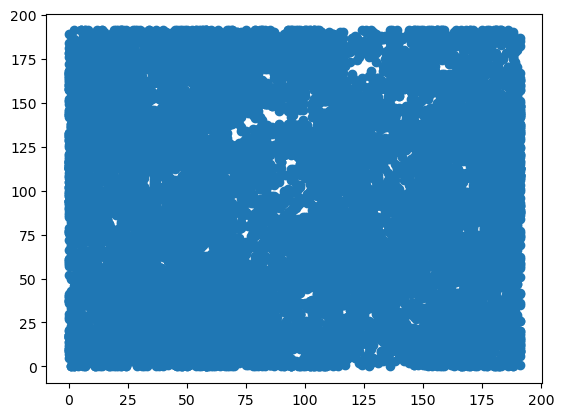

In [33]:
A = halos.halo_coords[:,0]
B = halos.halo_coords[:,1]
C = halos.halo_coords[:,2]

plt.scatter(A,B )
#plt.scatter(A,C)
#plt.scatter(B,C)

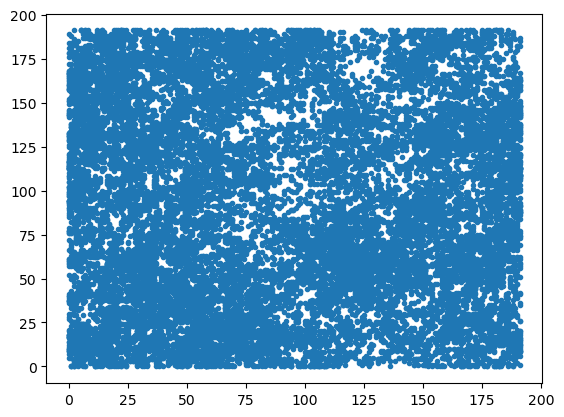

In [34]:
plt.plot(A,B, '.')
plt.show()

In [35]:
halos.n_halos

23937

In [36]:
halos.n_mass_bins

17

In [37]:
halos.cosmo_params.fields

{'SIGMA_8': <_cffi_backend.CField at 0x7f999721cea0>,
 'hlittle': <_cffi_backend.CField at 0x7f999721ca20>,
 'OMm': <_cffi_backend.CField at 0x7f999721c9f0>,
 'OMl': <_cffi_backend.CField at 0x7f999721c300>,
 'OMb': <_cffi_backend.CField at 0x7f999721c660>,
 'POWER_INDEX': <_cffi_backend.CField at 0x7f999721c960>}

In [38]:
halos.fields

{'n_halos': <_cffi_backend.CField at 0x7f999721def0>,
 'halo_masses': <_cffi_backend.CField at 0x7f999721d860>,
 'halo_coords': <_cffi_backend.CField at 0x7f999721c1e0>,
 'n_mass_bins': <_cffi_backend.CField at 0x7f999721dfb0>,
 'max_n_mass_bins': <_cffi_backend.CField at 0x7f999721c2a0>,
 'mass_bins': <_cffi_backend.CField at 0x7f999721d6e0>,
 'fgtrm': <_cffi_backend.CField at 0x7f999721dc80>,
 'sqrt_dfgtrm': <_cffi_backend.CField at 0x7f999721f210>,
 'dndlm': <_cffi_backend.CField at 0x7f999721d1d0>,
 'sqrtdn_dlm': <_cffi_backend.CField at 0x7f999721d350>}

(array([5.44810e+04, 1.44207e+05, 4.90210e+04, 1.10640e+04, 2.56000e+03,
        5.85000e+02, 1.67000e+02, 4.20000e+01, 1.30000e+01, 4.00000e+00]),
 array([-0.70705724, -0.26734808,  0.17236109,  0.61207026,  1.05177939,
         1.49148858,  1.93119776,  2.37090683,  2.81061602,  3.2503252 ,
         3.69003439]),
 <BarContainer object of 10 artists>)

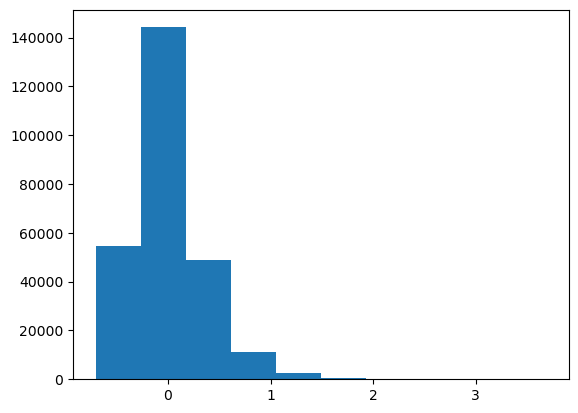

In [39]:
plt.hist(coeval.density.flatten())

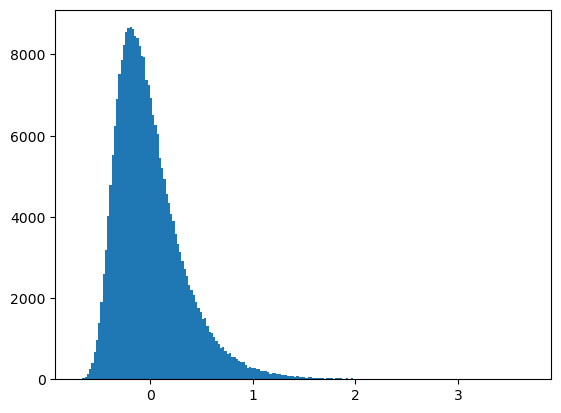

In [40]:
plt.hist(coeval.density.flatten(), bins=200)
plt.show()

In [41]:
coeval.astro_params.M_TURN

8.7

In [42]:
coeval.user_params.BOX_LEN

150

In [43]:
coeval.density.max()

3.6900344

In [62]:
coeval.brightness_temp_struct

2024-04-15 10:57:18,123 | WARNING | inputs.py::INHOMO_RECO() | You have set USE_MINI_HALOS to True but INHOMO_RECO to False! Automatically setting INHOMO_RECO to True.


BrightnessTemp(UserParams(BOX_LEN:150, DIM:192, FAST_FCOLL_TABLES:False, HII_DIM:64, HMF:1, MINIMIZE_MEMORY:False, NON_CUBIC_FACTOR:1, NO_RNG:False, N_THREADS:4, PERTURB_ON_HIGH_RES:False, POWER_SPECTRUM:0, USE_2LPT:True, USE_FFTW_WISDOM:False, USE_INTERPOLATION_TABLES:True, USE_RELATIVE_VELOCITIES:False); CosmoParams(OMb:0.0486, OMm:0.31, POWER_INDEX:0.97, SIGMA_8:0.81, hlittle:0.68); redshift:6; FlagOptions(FIX_VCB_AVG:False, INHOMO_RECO:True, M_MIN_in_Mass:True, PHOTON_CONS:False, SUBCELL_RSD:False, USE_CMB_HEATING:True, USE_HALO_FIELD:False, USE_LYA_HEATING:True, USE_MASS_DEPENDENT_ZETA:True, USE_MINI_HALOS:True, USE_TS_FLUCT:True); AstroParams(ALPHA_ESC:-0.5, ALPHA_STAR:0.5, ALPHA_STAR_MINI:0.5, A_LW:2, A_VCB:1, BETA_LW:0.6, BETA_VCB:1.8, F_ESC10:0.1, F_ESC7_MINI:0.01, F_H2_SHIELD:0, F_STAR10:0.05012, F_STAR7_MINI:0.01, HII_EFF_FACTOR:30, ION_Tvir_MIN:50000, L_X:1e+40, L_X_MINI:1e+40, M_TURN:5.012e+08, NU_X_THRESH:500, N_RSD_STEPS:20, R_BUBBLE_MAX:50, X_RAY_SPEC_INDEX:1, X_RAY_Tvi

In [45]:
!USE_MINI_HALOS

/bin/bash: USE_MINI_HALOS: command not found


In [67]:
coeval.brightness_temp_struct.find_existing

2024-04-15 10:59:05,220 | WARNING | inputs.py::INHOMO_RECO() | You have set USE_MINI_HALOS to True but INHOMO_RECO to False! Automatically setting INHOMO_RECO to True.


<bound method OutputStruct.find_existing of BrightnessTemp(UserParams(BOX_LEN:150, DIM:192, FAST_FCOLL_TABLES:False, HII_DIM:64, HMF:1, MINIMIZE_MEMORY:False, NON_CUBIC_FACTOR:1, NO_RNG:False, N_THREADS:4, PERTURB_ON_HIGH_RES:False, POWER_SPECTRUM:0, USE_2LPT:True, USE_FFTW_WISDOM:False, USE_INTERPOLATION_TABLES:True, USE_RELATIVE_VELOCITIES:False); CosmoParams(OMb:0.0486, OMm:0.31, POWER_INDEX:0.97, SIGMA_8:0.81, hlittle:0.68); redshift:6; FlagOptions(FIX_VCB_AVG:False, INHOMO_RECO:True, M_MIN_in_Mass:True, PHOTON_CONS:False, SUBCELL_RSD:False, USE_CMB_HEATING:True, USE_HALO_FIELD:False, USE_LYA_HEATING:True, USE_MASS_DEPENDENT_ZETA:True, USE_MINI_HALOS:True, USE_TS_FLUCT:True); AstroParams(ALPHA_ESC:-0.5, ALPHA_STAR:0.5, ALPHA_STAR_MINI:0.5, A_LW:2, A_VCB:1, BETA_LW:0.6, BETA_VCB:1.8, F_ESC10:0.1, F_ESC7_MINI:0.01, F_H2_SHIELD:0, F_STAR10:0.05012, F_STAR7_MINI:0.01, HII_EFF_FACTOR:30, ION_Tvir_MIN:50000, L_X:1e+40, L_X_MINI:1e+40, M_TURN:5.012e+08, NU_X_THRESH:500, N_RSD_STEPS:20, R_